# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

### 目录:
[1 矩阵运算](#1-矩阵运算)  
[2 Gaussian Jordan 消元法](#2-Gaussian-Jordan-消元法)  
[3  线性回归](#3-线性回归)  

In [1]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 10 # TODO

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [2]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0], 
     [0,1,0,0], 
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [3]:
# TODO 返回矩阵的行数和列数
def shape(M):
    r0 = M[0]
    row = len(M)
    col = len(r0)
    return (row,col)

In [4]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [5]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    row, col = shape(M)
    r = 0
    while r < row:
        c = 0
        while c < col:
            M[r][c] = round(M[r][c], decPts)
            c += 1
        r += 1
    

In [6]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.013s

OK


## 1.4 计算矩阵的转置

In [7]:
def create_array(row, col):
    M = [None] * row
    r = 0
    while r < row:
        M[r] = [None] * col
        r += 1
    return M

In [8]:
# TODO 计算矩阵的转置
def transpose(M):
    row, col = shape(M)
    n_row, n_col =  col, row
    n_M = create_array(n_row,n_col)
    r , c = 0 , 0
    while r < n_row:
        c = 0
        while c < n_col:
            n_M[r][c] = M[c][r]
            c += 1
        r += 1
    return n_M

In [9]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.012s

OK


## 1.5 计算矩阵乘法 AB

In [10]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    A_row, A_col = shape(A)
    B_row, B_col = shape(B)
    if A_col != B_row and A_row != B_col:
        raise ValueError('Can mutltiply A by B (size incorrect)')
    else:
        n_row, n_col = A_row, B_col
        M = create_array(n_row, n_col)
        r, c = 0, 0
        while c < n_col:
            r = 0
            while r < n_row:
                r = 0         
                while r < n_row:
                    sum  = 0
                    i = 0
                    while i < B_row:
                        sum += A[r][i]*B[i][c]
                        i += 1
                    M[r][c] = sum
                    r += 1                
            c += 1
        return M

In [11]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.087s

OK


---

# 2 Gaussian Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [12]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    row , col = shape(A)
    n_row, n_col = row, col + 1    
    M = create_array(n_row, n_col)
    r , c  = 0 , 0
    for row in A:
        c = 0
        for ele in row:
            M[r][c] = ele
            c += 1
        M[r][c] = b[r][0]
        r += 1
    return M

In [13]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [14]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    row = M[r1]
    M[r1] = M[r2]
    M[r2] = row

In [15]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [16]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def is_zero(num, epsilon = 1.0e-16):    
    return (abs(num) < epsilon)
def scaleRow(M, r, scale):
    if scale is 0:
        raise ValueError('scale can not be zero')
    else:
        row, col = shape(M)
        n_row = [None] * col
        i = 0 
        while i < col:
            n_row[i] = M[r][i] * scale
            if is_zero(n_row[i]):
                n_row[i] = 0
            i += 1
        M[r] = n_row

In [17]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [18]:

# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    if scale is 0:
        raise ValueError('scale can not be zero')
    else:
        row, col = shape(M)
        n_row = [None] * col
        i = 0
        while i < col:
            n_row[i] = M[r1][i] + M[r2][i] * scale
            if is_zero(n_row[i]):
                n_row[i] = 0
            i += 1
        M[r1] = n_row

In [19]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

#### 推演示例 


$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 & -2 & 9 & 1\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$
    

#### 推演有以下要求:
1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步
2. 用分数来表示
3. 分数不能再约分
4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可
5. 可以用[这个页面](http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi?c=sys)检查你的答案(注意只是答案, 推演步骤两者算法不一致)

_你可以用python的 [fractions](https://docs.python.org/2/library/fractions.html) 模块辅助你的约分_

#### 分数的输入方法
(双击这个区域就能看到语法啦)  
  
示例一: $\frac{n}{m}$  

示例二: $-\frac{a}{b}$  

#### 以下开始你的尝试吧!

In [20]:
# 不要修改这里！
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -1, -6,  5 ||  1 
-10,  7,  6 ||  1 
  7, -2, -1 ||  1 


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    1 & 6 & 15 & -1 \\
    0 & 67 & -44 & -9 \\
    0 & -22 & 17 & 4 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 6 & 15 & -1 \\
    0 & 1 & \frac{-44}{67} & \frac{-9}{67} \\
    0 & 0 & \frac{171}{67} & \frac{70}{67} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{41}{171} \\
    0 & 1 & 0 & \frac{23}{171} \\
    0 & 0 & 1 & \frac{70}{171} \end{bmatrix}$

In [21]:
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  0,-10,  9 ||  1 
 -8,  8, -6 ||  1 
  8, -8,  6 ||  1 


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    0 & -10 & 9 & 1 \\
    -8 & 8 & -6 & 1 \\
    8 & -8 & 6 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    8 & -8 & 6 & 1 \\
    -8 & 8 & -6 & 1 \\
    0 & -10 & 9 & 1 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    8 & -8 & 6 & 1 \\
    0 & 0 & 0 & 2 \\
    0 & -10 & 9 & 1 \end{bmatrix}$
    

### 2.3.3 实现 Gaussian Jordan 消元法

In [22]:

def first_not_zero_index(row, epsilon = 1.0e-16):
    i = 0
    for item in row:
        if is_zero(item, epsilon) == False:
            break
        else:
            i += 1
    return i
def order_row_on_diagonal_not_zero(M):
    m_row, m_col = shape(M)
    r = 0
    print('order_row_on_diagonal_not_zero')
    while r < m_row:
        #idx = first_not_zero_index(M[r])
        if M[r][r] == 0:
            r_swap = r + 1
            
            while r_swap < m_row:
                if M[r_swap][r] != 0:
                    break
                """if first_not_zero_index(M[r_swap]) <= r_swap :
                    break"""
                r_swap += 1
            print('r_swap:{}, m_row:{}'.format(r_swap,m_row))
            swapRows(M, r, r_swap)  
            printMatrix(M)
        r += 1
def is_singualar(M, r = 0, epsilon = 1.0e-10):
    row, col = shape(M)
    #print('is_singualar fun')
    #printMatrix(M)
    while r < min(row, col):
        c , all_ele_zero = 0, True
        while c < col - 1:                 
            #print('M[r][c] = {}'.format(M[r][c]))
            if is_zero(M[r][c], epsilon) is False:
                all_ele_zero = False
                break
            c += 1
        if all_ele_zero:
            return True
        r += 1
    return False

def printMatrix(M):    
    for row in M:      
        s = ''
        for ele in row:
            s +=  '{:6.2f}'.format(ele) + ','
        print(s)
    print("")
def matrix_AB_to_A_B(M):
    row, col = shape(M)
    A = create_array(row, col-1)
    B = create_array(row, 1)
    r = 0
    while r < row:
        c = 0
        while c < col:
            if c < col -1 :
                A[r][c] = M[r][c]
            else:
                B[r][0] = M[r][c]
            c += 1
        r += 1
    return (A, B)


In [23]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    a_row, a_col = shape(A)
    b_row, b_col = shape(b)
    if a_row != b_row and a_col != b_row:
        raise ValueError('Row number of A and B are not euqal')
        return None
    M = augmentMatrix(A,b) 
    c = 0
    while c < min(a_col, a_row):  
        #row operation 1    
        r =  c 
        max_row, max_value = -1 , 0
        while r < a_row:
            num = abs(M[r][c])
            if num > max_value:
                max_value = num
                max_row = r
            r += 1
        if max_row != c and max_row!= -1:
            swapRows(M, c, max_row) 
            
        #row operation 2
        r = 0
        while r < a_row:
            if not is_zero(M[r][r]):
                scaleRow(M, r, 1/M[r][r]) 
                if is_singualar(M, r = r):
                    return None
            r += 1
        
        #row operation 3    
        r = c
        while r < a_row - 1:
            if not is_zero(M[c][c]):
                #if not is_zero( M[r+1][c]):
                s = -1 * M[r+1][c]/M[c][c]
                addScaledRow(M, r + 1, c , s)
            r += 1
        c += 1
   
    if not is_zero( M[a_row - 1][a_col-1]) :
        scaleRow(M, a_row -1, 1/ M[a_row - 1][a_col-1]) 
    
    r = a_row - 1
    while r > 0:
        r_cnt = r
        while r_cnt > 0: 
            s = - M[r_cnt -1][r]
            if not is_zero(s):
                addScaledRow(M, r_cnt -1, r, s)
                if is_singualar(M, r = r):
                    return None
            r_cnt -= 1        
        r -= 1
        
    if is_singualar(M):
        return None
    ans = [None] * b_row
    i = 0
    while i < b_row:
        ans[i] = [M[i][a_col]]
        i += 1
    return ans

#is_singualar(D)

In [24]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 12.823s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3 线性回归

## 3.1 随机生成样本点

<IPython.core.display.Javascript object>


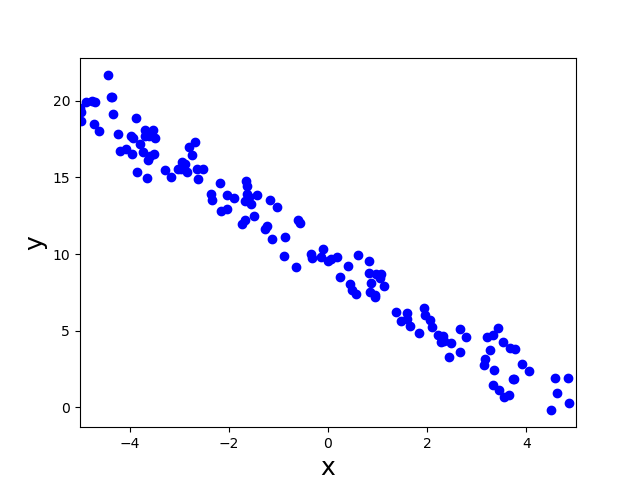

In [25]:
# 不要修改这里！
%matplotlib notebook
from helper import *

X,Y = generatePoints2D(seed)
vs_scatter_2d(X, Y)

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

<IPython.core.display.Javascript object>


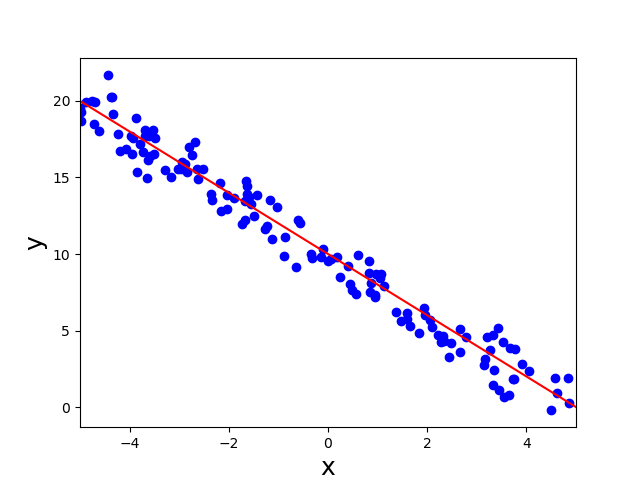

In [26]:
#TODO 请选择最适合的直线 y = mx + b
m1 = -2.0
b1 = 10.0

# 不要修改这里！
vs_scatter_2d(X, Y, m1, b1)

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [27]:
# TODO 实现以下函数并输出所选直线的MSE
def calculateMSE2D(X,Y,m,b):
    n = len(X)
    i, _sum = 0, 0
    while i < n: 
        _sum += (Y[i]-m*X[i]-b)**2
        i += 1        
    return (_sum/n)

# TODO 检查这里的结果, 如果你上面猜测的直线准确, 这里的输出会在1.5以内
print(calculateMSE2D(X,Y,m1,b1))

1.120339293146363


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

证明 式子1:
$$
\begin{aligned}
\frac{\partial E}{\partial m} 
&= \frac{\partial }{\partial m}(\frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}) \\
&= \frac{1}{2}\frac{\partial}{\partial m}\sum_{i=1}^{n}{(y_i - mx_i - b)^2} \\
&=\frac{1}{2}\frac{\partial}{\partial m}\sum_{i=1}^{n}{(y_i^2+m^2x_i^2+b^2-2mx_iy_i+2bmx_i-2by_i^2)}\\
&=\frac{1}{2}\frac{\partial}{\partial m}\sum_{i=1}^{n}{(m^2x_i^2-2mx_iy_i+2bmx_i)} \\
&=\frac{1}{2}\sum_{i=1}^{n}{(\frac{\partial}{\partial m}m^2x_i^2-\frac{\partial}{\partial m}2mx_iy_i+\frac{\partial}{\partial m}2bmx_i)} \\
&=\frac{1}{2}\sum_{i=1}^{n}{(2mx_i^2-2x_iy_i+2bx_i)} \\
&=\sum_{i=1}^{n}{(mx_i^2-x_iy_i+bx_i)} \\
&=\sum_{i=1}^{n}{-x_i(y_i-mx_i-b)}\\
\end{aligned}
$$



证明 式子2:
$$
\begin{aligned}
\frac{\partial E}{\partial b} 
&= \frac{\partial }{\partial b}(\frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}) \\
&= \frac{1}{2}\frac{\partial}{\partial b}\sum_{i=1}^{n}{(y_i - mx_i - b)^2} \\
&=\frac{1}{2}\frac{\partial}{\partial b}\sum_{i=1}^{n}{(y_i^2+m^2x_i^2+b^2-2mx_iy_i+2bmx_i-2by_i)}\\
&=\frac{1}{2}\frac{\partial}{\partial b}\sum_{i=1}^{n}{(b^2+2bmx_i-2by_2)} \\
&=\frac{1}{2}\sum_{i=1}^{n}{(\frac{\partial}{\partial b}b^2+\frac{\partial}{\partial b}2bmx_i-\frac{\partial}{\partial b}2by_i)} \\
&=\frac{1}{2}\sum_{i=1}^{n}{(2b+2mx_i-2y_i)} \\
&=\sum_{i=1}^{n}{-(y_i-mx_i-b)} \\
\end{aligned}
$$

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数
$$
\begin{aligned}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
&= (-2+m+b)+(-4+4m+2b)+(-6+9m+3b) = -11+14m+6b = 0
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} 
&=(-1+m+b)+(-2+2m+b)+(-2+3m+3b) =-5+6m+3b = 0 \\
\end{aligned}
$$

$$
\begin{cases}
14m+6b &= 11\\
6m+3b &= -5
\end{cases}\\
$$
$$
\begin{cases}
2m+0b &= 1\\
6m+3b &= -5
\end{cases}\\
$$
$$
\begin{cases}
m &= \frac{1}{2}\\
b &= \frac{2}{3}\\
\end{cases}\\
$$
$$
y = \frac{1}{2}x+\frac{2}{3}
$$

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [28]:
# TODO 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：线性回归的系数(如上面所说的 m, b)
'''
def linearRegression2D(X,Y):
    return 0.,0.

In [29]:
# 请不要修改下面的代码
m2,b2 = linearRegression2D(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

0.0 0.0


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

<IPython.core.display.Javascript object>


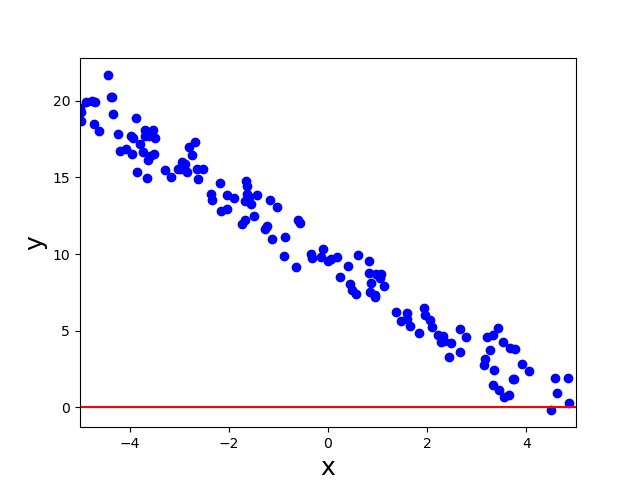

150.53579477589474


In [30]:
## 请不要修改下面的代码
vs_scatter_2d(X, Y, m2, b2)
print(calculateMSE2D(X,Y,m2,b2))

## Bonus !!!
如果你的高斯约当消元法通过了单元测试, 那么它将能够解决多维的回归问题  
你将会在更高维度考验你的线性回归实现

<IPython.core.display.Javascript object>


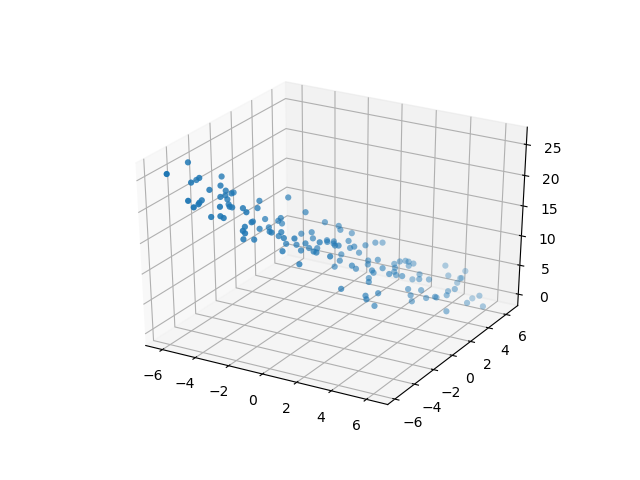

In [31]:
# 生成三维的数据点
X_3d, Y_3d = generatePoints3D(seed)
vs_scatter_3d(X_3d, Y_3d)

你的线性回归是否能够对付三维的情况?

In [32]:
def linearRegression(X,Y):
    return None

<IPython.core.display.Javascript object>


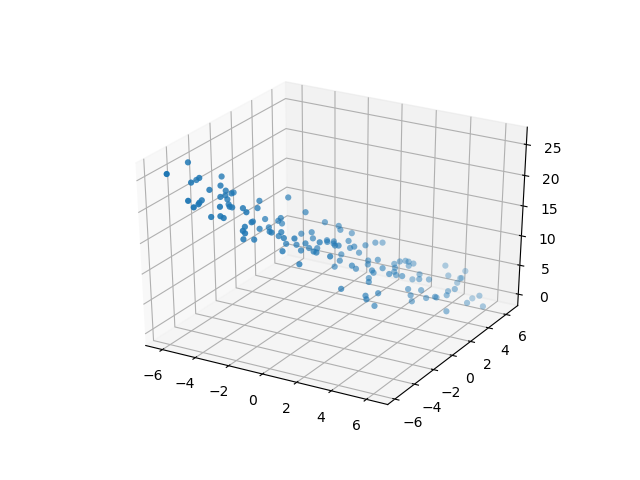

In [33]:
coeff = linearRegression(X_3d, Y_3d)
vs_scatter_3d(X_3d, Y_3d, coeff)